In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
print("Size :",df.shape)

Size : (32560, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.columns = ['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [9]:
df.isna().sum()    

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
df['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [12]:
label_encode = LabelEncoder()

In [13]:
df['income'] = label_encode.fit_transform(df['income'])

In [14]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [15]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [16]:
df['income'].value_counts()

0    24719
1     7841
Name: income, dtype: int64

In [17]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int32
dtype: object

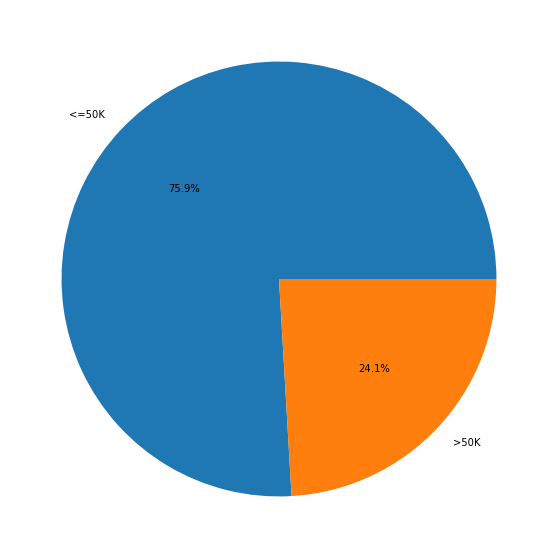

In [18]:
ax = df['income'].value_counts().plot(kind='pie', figsize=(14,10), autopct='%1.1f%%', labels=["<=50K",">50K"])
ax.axes.get_yaxis().set_visible(False)

In [19]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- Age ---
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
---- Workclass ---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
---- Fnlwgt ---
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
---- Education ---
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4t

In [20]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
print(cat_cols)

['Workclass', 'Education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [21]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [22]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [23]:
df.duplicated().sum()

24

In [24]:
df = df.drop_duplicates()
df.shape

(32536, 15)

In [25]:
df.drop(['Workclass', 'Education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'], axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Fnlwgt          32536 non-null  int64
 2   education_num   32536 non-null  int64
 3   capital_gain    32536 non-null  int64
 4   capital_loss    32536 non-null  int64
 5   hours_per_week  32536 non-null  int64
 6   income          32536 non-null  int32
dtypes: int32(1), int64(6)
memory usage: 1.9 MB


In [27]:
df.shape

(32536, 7)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0
income,32536.0,0.240933,0.427656,0.0,0.0,0.0,0.00,1.0


# Model Building

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22775, 6)
(9761, 6)
(22775,)
(9761,)


In [30]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('predicted Results\n',ypred)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classficaition Report\n',classification_report(y_test,ypred))
    mis_class=((cm[0][1]+cm[1][0])/(cm[0][0]+cm[1][0]+cm[0][1]+cm[1][1]))*100
    print('\nMisclassification :',mis_class,'%')

# 1) Decision Tree Classifier 

In [31]:
m1 = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=14)
gen_metrics(m1,x_train,x_test,y_train,y_test)

Training score 0.8387705817782657
Testing score 0.8325991189427313
predicted Results
 [0 0 0 ... 0 1 0]
Confusion Matrix
 [[7096  287]
 [1347 1031]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      7383
           1       0.78      0.43      0.56      2378

    accuracy                           0.83      9761
   macro avg       0.81      0.70      0.73      9761
weighted avg       0.83      0.83      0.81      9761


Misclassification : 16.740088105726873 %


# 2) Random Forest Classifer

In [32]:
m2 = RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=12)
gen_metrics(m2,x_train,x_test,y_train,y_test)

Training score 0.8512403951701427
Testing score 0.8389509271591026
predicted Results
 [0 0 0 ... 0 1 0]
Confusion Matrix
 [[7101  282]
 [1290 1088]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      7383
           1       0.79      0.46      0.58      2378

    accuracy                           0.84      9761
   macro avg       0.82      0.71      0.74      9761
weighted avg       0.83      0.84      0.82      9761


Misclassification : 16.104907284089744 %


# 3) KNN Classifier

In [33]:
m3 = KNeighborsClassifier(n_neighbors=27)
gen_metrics(m3,x_train,x_test,y_train,y_test)

Training score 0.8006147091108672
Testing score 0.7971519311545948
predicted Results
 [0 0 0 ... 0 1 0]
Confusion Matrix
 [[7321   62]
 [1918  460]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      7383
           1       0.88      0.19      0.32      2378

    accuracy                           0.80      9761
   macro avg       0.84      0.59      0.60      9761
weighted avg       0.81      0.80      0.74      9761


Misclassification : 20.28480688454052 %


# 4) Logistic Regression

In [34]:
m4 = LogisticRegression(max_iter=1000)
gen_metrics(m4,x_train,x_test,y_train,y_test)

Training score 0.7977607025246981
Testing score 0.7973568281938326
predicted Results
 [0 0 0 ... 0 1 0]
Confusion Matrix
 [[7141  242]
 [1736  642]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      7383
           1       0.73      0.27      0.39      2378

    accuracy                           0.80      9761
   macro avg       0.77      0.62      0.64      9761
weighted avg       0.79      0.80      0.76      9761


Misclassification : 20.26431718061674 %


# 5)SVM Classifer

In [35]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.80)

In [ ]:
m5 = SVC(kernel='linear')
gen_metrics(m5,x_train,x_test,y_train,y_test)

# Random Forest Classifier shows the best accuracy of 0.84